# <center>  Python for biologists

# Lecture 9, 11 and 12; Pandas
08.11.2025,
22.11.2025,
29.11.2025

---

<a href="https://pandas.pydata.org/">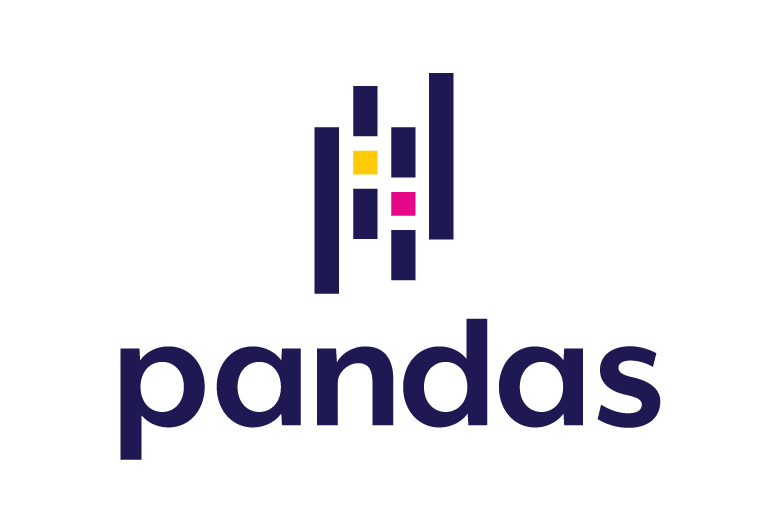</a>
# Pandas: Python Data Analysis Library

[Pandas](https://pandas.pydata.org/) - oсновная библиотека для работы с дата-фреймами в Python. Помимо неё часто также используют [polars](https://pola.rs/) и [dask](https://www.dask.org/) - эти библиотеки особенно актуальны если вы хотите работать с огромными (нереально огромными) таблицами. В остальном Pandas'а будет достаточно, да и любые аналоги стараются делать свой интерфейс идейно похожим на Pandas, так что мы детально разберем именно его.

Название **Pandas** происходит от выражения *Panel Data* — так называют данные, которые описывают несколько объектов, наблюдаемых в разные моменты времени. В простом виде это таблица, в которой есть и разные сущности, и временная компонентa для каждой из них.


Устанавливается просто с помощью `pip`:


In [1]:
! pip install pandas

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Структура данных

Ключевая структурная единица в `pandas` — это объект `pd.Series`.  
Это одномерная последовательность данных с явной меткой для каждого элемента, что делает её удобной для выборок и арифметических операций.  
На базе `Series` построены все остальные структуры библиотеки, включая `DataFrame`. 


In [3]:
print([10, 20, 30]) # наш привычный список
print(np.array([10, 20, 30])) # numpy-массив, печатается чуть компактнее
print(pd.Series([10, 20, 30])) # pd.Series - смотрите какой многсловный вывод!

[10, 20, 30]
[10 20 30]
0    10
1    20
2    30
dtype: int64


### Типы данных в `pd.Series`

В отличие от массивов `numpy`, где все элементы обязаны иметь один и тот же тип, в `pd.Series` могут соседствовать значения разных типов.  
Технически в таком случае всей колонке будет назначен общий тип `dtype: object`, однако это **не означает** автоматического приведения всех элементов к одному формату — каждый объект сохраняет свой собственный тип.  
Это делает `Series` более гибкой, но иногда требует аккуратной работы с данными.

In [4]:
np.array([10, '20', True]) # тут все привелось к строковому типу данных

array(['10', '20', 'True'], dtype='<U21')

In [5]:
var = pd.Series([10, '20', True]) # здесь типы данных сохранились, но у всей серии теперь dtype: object
print(var)

0      10
1      20
2    True
dtype: object


In [6]:
print(type(var[0])) # int
print(type(var[1])) # str
print(type(var[2])) # bool

<class 'int'>
<class 'str'>
<class 'bool'>


Тип данных **`object`** в `pandas` — это особый универсальный контейнер, который может хранить значения любого типа: числа, строки, булевы значения, списки, словари, пользовательские объекты и многое другое.  

Но если задать конкретный тип, то данные, конечно же, приведутся.

In [7]:
pd.Series([10, 20, True], dtype='int64')

0    10
1    20
2     1
dtype: int64

### Имена и индексы

Ключевое отличие `pd.Series` от `np.ndarray` заключается в том, что в `pd.Series` у всего есть ***имена***. Благодаря этому работа с данными становится гораздо более выразительной и удобной.

Имена есть у:
- самой `pd.Series` — атрибут `name`, который помогает описать содержимое серии (например, название колонки);
- элементов `pd.Series` — атрибут `index`, задающий метки (индексы), по которым можно обращаться к значениям.  

Мы могли уже увидеть их вот в таком выводе pd-серии:

In [8]:
var

0      10
1      20
2    True
dtype: object

In [9]:
print(var.index)
print(var.name) # В данном случае имя самой серии не задано

RangeIndex(start=0, stop=3, step=1)
None


Когда мы создаём `pd.Series` без явного указания индекса, `pandas` автоматически назначает ей **RangeIndex**.  
Это специальный тип индекса, который генерирует последовательность целых чисел от 0 до *n-1* — по сути, аналог «обычной нумерации строк».  

Эти имена, естественно, можно определять и переопределять

In [10]:
var = pd.Series([10, 20, 30], index=['apple', 'banana', 'garlic'], name='fruit_counts')
print(var)

apple     10
banana    20
garlic    30
Name: fruit_counts, dtype: int64


Это чем-то похоже на словарь на стероидах.
Вы можете работать с `Series` примерно так же, как со словарём: обращаться к значениям по ключам (индексам), изменять их, вставлять новые элементы или удалять существующие.  

In [11]:
var['apple'] = 9
print(var)

apple      9
banana    20
garlic    30
Name: fruit_counts, dtype: int64


И даже можете превратить в словарь.

In [12]:
var.to_dict()

{'apple': 9, 'banana': 20, 'garlic': 30}

### Таблицы - `pd.DataFrame`

`pd.Series`, будучи приставлены друг к другу, становятся полноценной таблицей - `pd.DataFrame`. При этом это не просто матрица, как в случае с `numpy`, а прям честная таблица:
- У неё есть имена строк (те самые indexes)
- У неё есть имена колонов (те самые names, или, теперь уже, colnames)

In [13]:
df = pd.DataFrame(var)
df

,fruit_counts
apple,9
banana,20
garlic,30


In [14]:
print('Row names:', df.index)
print('Col names:', df.columns)

Row names: Index(['apple', 'banana', 'garlic'], dtype='object')
Col names: Index(['fruit_counts'], dtype='object')


`DataFrame` безусловно может состоять из нескольких колонок:

In [15]:
pd.DataFrame([var, var, var]).T

,fruit_counts,fruit_counts,fruit_counts
apple,9,9,9
banana,20,20,20
garlic,30,30,30


Здесь чисто из-за особенностей реализации мне пришлось его транспонировать (`.T`), но на суть это не влияет.

Ладно, что мы всё о помидорах да о помидорах, давайте что-нибудь побольше откроем

## Чтение данных

В `pandas` существует целое семейство функций `read_*` для загрузки таблиц из разных форматов: CSV, Excel, JSON, Parquet и многих других.  
На практике чаще всего используется именно `pd.read_csv()`, так как подавляющее большинство открытых датасетов распространяются в формате CSV.

Вот несколько основных параметров `read_csv`, которые могут пригодиться:

- **`sep`** — разделитель колонок (часто `","`, `"\t"`, `";"`).
- **`header`** — строка, содержащая названия колонок, или `None`, если заголовков нет.
- **`index_col`** — колонка, которую нужно использовать как индекс.
- **`names`** — задать собственные имена колонок при чтении.
- **`comment`** — символ, с которого начинается комментарий в файле (например, `"#"`).

На самом деле параметров гораздо больше — `read_csv` является одной из самых гибких и настраиваемых функций в `pandas`. Полный список доступен в документации:  
https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html

### Пути к файлам: локально, онлайн, архивы

`pandas` позволяет читать данные из самых разных источников без дополнительной обработки:

- Локальный абсолютный путь  
  Например: `/Users/nikita/data/table.csv`

- Локальный относительный путь  
  Например: `./data/table.csv` или `data/table.csv`

- URL (прямо из интернета)  
  Например: `https://raw.githubusercontent.com/.../data.csv`  
  В этом случае `pandas` сам скачает файл.

- ZIP-архивы (без предварительного распаковки)  
  Можно указывать путь к архиву, например:  
  `data/archive.zip`  
  или  
  `https://.../dataset.zip`  
  — и `pandas` сам извлечёт нужный CSV внутри ZIP-файла.


Ниже приведены несколько источников данных, с которыми вы можете поэкспериментировать, чтобы попрактиковаться в работе с `pandas`.  
Это разнообразные по структуре и сложности датасеты — от классических примеров до более специализированных биологических данных.


- [Titanic](https://www.kaggle.com/competitions/titanic/overview)
- [Olympics](https://www.kaggle.com/datasets/heesoo37/120-years-of-olympic-history-athletes-and-results)
- [Students Stress Survey](https://www.kaggle.com/datasets/samyakb/student-stress-factors/)
- [Second Wizard War](https://www.kaggle.com/datasets/sheikhsohelmoon/harry-potters-second-wizard-war-dataset)
- [Russian Elections 2018](https://www.kaggle.com/datasets/rexhaif/ru-elections-2018)
- [CTCF and SMC3 ChIP-seqs](https://www.encodeproject.org/search/?type=Experiment&replicates.library.biosample.donor.organism.scientific_name=Homo+sapiens&biosample_ontology.classification=primary+cell&biosample_ontology.classification=cell+line&biosample_ontology.classification=in+vitro+differentiated+cells&assay_title=TF+ChIP-seq&biosample_ontology.term_name=neural+cell) 


In [16]:
data_dir = 'https://raw.githubusercontent.com/Python-BI-2024-25/course_materials/main/data/'
### Something most popular to start with ###
titanic = pd.read_csv(data_dir + 'titanic.csv')
olympics = pd.read_csv('https://github.com/cleuer/olympics/raw/master/src/main/resources/olympic_history_120_years.csv')

### Biological datasets ###
bed_colnames = ('chr', 'start', 'stop', 'name', 'score', 'strand', 'signalValue', 'pValue', 'qValue', 'peak')
ctcf = pd.read_csv(data_dir + 'CTCF_neurons.bed', sep='\t', header=None, names=bed_colnames)
smc = pd.read_csv(data_dir + 'SMC3_neurons.bed', sep='\t', header=None, names=bed_colnames)

### Something additional just for fun ###
students_stress = pd.read_csv(data_dir + 'students_stress_survey.csv')
second_wiz_war = pd.read_csv(data_dir + 'second_wizard_war.csv')
rus_elections = pd.read_csv(data_dir + 'russian_elections_2018.csv')

In [17]:
pd.read_csv(data_dir + 'titanic.csv')

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [18]:
pd.read_csv(data_dir + 'SMC3_neurons.bed', sep='\t', header=None, names=bed_colnames) # bed narrowPeak

,chr,start,stop,name,score,strand,signalValue,pValue,qValue,peak
0,chr18,47748909,47749704,.,1000,.,3415.07184,-1.0,4.66501,391
1,chr11,66408273,66409074,.,1000,.,3406.02991,-1.0,4.66501,366
2,chr3,184561033,184561798,.,1000,.,3301.53779,-1.0,4.66501,393
3,chr1,203701817,203702620,.,1000,.,3218.67645,-1.0,4.66501,428
4,chr16,77235854,77236636,.,1000,.,3213.11206,-1.0,4.66501,390
...,...,...,...,...,...,...,...,...,...,...
50017,chr16,27456965,27457612,.,1000,.,12.46099,-1.0,0.29982,546
50018,chr11,109425683,109426213,.,1000,.,12.45984,-1.0,0.29976,265
50019,chr6,165663194,165663724,.,750,.,12.45954,-1.0,0.29974,265
50020,chr1,25905125,25905655,.,562,.,12.45717,-1.0,0.29958,265


## Базовый обзор датасета

«Наивный» отбор строчек — это самый простой способ посмотреть на данные, когда мы просто запрашиваем несколько строк таблицы. Для этого чаще всего используют методы `head()`, `tail()` и `sample()`.


In [19]:
titanic.head(3) # первые 3

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


In [20]:
titanic.tail(3) # последние 3

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [21]:
titanic.sample(3) # случайные 3

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
124,1016,3,"Kennedy, Mr. John",male,NaN,0,0,368783,7.7500,NaN,Q
321,1213,3,"Krekorian, Mr. Neshan",male,25.0,0,0,2654,7.2292,F E57,C
41,933,1,"Franklin, Mr. Thomas Parham",male,NaN,0,0,113778,26.5500,D34,S


Размеры датасета можно быстро оценить через свойства `size`, `shape` и функцию `len()`, которые показывают общее число элементов, форму таблицы и количество строк соответственно.

In [22]:
print( titanic.size )
print( titanic.shape )
print( titanic.shape[0] )
print( len(titanic) )

4598
(418, 11)
418
418


Дополнительную информацию о структуре данных можно получить через `dtypes` (типы колонок), `columns` (список названий колонок) и `index` (тип и значения индекса).

In [23]:
titanic.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [24]:
titanic.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [25]:
titanic.index

RangeIndex(start=0, stop=418, step=1)

Если говорить про типы данных, то на самом деле их есть довольно много. Вот [сводная таблица](https://dfedorov.spb.ru/pandas/%D0%9E%D0%B1%D0%B7%D0%BE%D1%80%20%D1%82%D0%B8%D0%BF%D0%BE%D0%B2%20%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D1%85%20pandas.html) допустимых типов:


<table>
<thead><tr>
<th>Pandas</th>
<th>Python</th>
<th>NumPy</th>
<th>Использование</th>
</tr>
</thead>
<tbody>
<tr>
<td>object</td>
<td>str или смесь</td>
<td>string<em>, unicode</em>, смешанные типы</td>
<td>Текстовые или смешанные числовые и нечисловые значения</td>
</tr>
<tr>
<td>int64</td>
<td>int</td>
<td>int_, int8, int16, int32, int64, uint8, uint16, uint32, uint64</td>
<td>Целые числа</td>
</tr>
<tr>
<td>float64</td>
<td>float</td>
<td>float_, float16, float32, float64</td>
<td>Числа с плавающей точкой</td>
</tr>
<tr>
<td>bool</td>
<td>bool</td>
<td>bool_</td>
<td>Значения True/False</td>
</tr>
<tr>
<td>datetime64</td>
<td>datetime</td>
<td>datetime64[ns]</td>
<td>Значения даты и времени</td>
</tr>
<tr>
<td>timedelta[ns]</td>
<td>NA</td>
<td>NA</td>
<td>Разность между двумя datetimes</td>
</tr>
<tr>
<td>category</td>
<td>NA</td>
<td>NA</td>
<td>Ограниченный список текстовых значений</td>
</tr>
</tbody>
</table>

## Индексация

### По столбцам

В `pandas` можно использовать квадратные скобки для выбора колонок по имени.  
Если указать одно имя столбца, результатом будет объект `pd.Series`:

In [26]:
titanic['Age']

0      34.5
1      47.0
2      62.0
3      27.0
4      22.0
       ... 
413     NaN
414    39.0
415    38.5
416     NaN
417     NaN
Name: Age, Length: 418, dtype: float64

In [27]:
type(titanic['Age'])

pandas.core.series.Series

Если передать список колонок, то результатом станет `pd.DataFrame`:

In [28]:
titanic[['Age', 'Name']].sample(3)

,Age,Name
318,27.0,"Jonsson, Mr. Nils Hilding"
293,53.0,"Dodge, Dr. Washington"
364,25.0,"Harder, Mrs. George Achilles (Dorothy Annan)"


Здесь кстати можно сделать интереный трюк - если подать в `[...]` список из одного элемента, то нам вернется `pd.DataFrame` из одной колонки (сравните в каком виде печатается результат ниже). Иногда такое бывает полезно, если вам нужно использовать какую-нибудь функцию не умеющую работать с отдельными `pd.Series`. 

In [29]:
type(titanic[['Age']])

pandas.core.frame.DataFrame

In [30]:
titanic['Age'].head(3)

0    34.5
1    47.0
2    62.0
Name: Age, dtype: float64

In [31]:
titanic[['Age']].head(3)

,Age
0,34.5
1,47.0
2,62.0


### По строкам

Для индексации по строкам в `pandas` используется специальный локатор **`.loc`**, который работает в квадратных скобках. С его помощью можно использовать знакомый синтаксис, похожий на работу со списками: выбирать отдельные строки, делать срезы и фильтровать данные.

In [32]:
titanic.loc[0:3]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S


### Комбинированно

Также `.loc` позволяет одновременно указывать, какие строки и какие столбцы нужно выбрать.  

In [33]:
titanic.loc[:3, 'Name']

0                    Kelly, Mr. James
1    Wilkes, Mrs. James (Ellen Needs)
2           Myles, Mr. Thomas Francis
3                    Wirz, Mr. Albert
Name: Name, dtype: object

In [34]:
titanic.loc[:3, ['Name', 'Age']]

,Name,Age
0,"Kelly, Mr. James",34.5
1,"Wilkes, Mrs. James (Ellen Needs)",47.0
2,"Myles, Mr. Thomas Francis",62.0
3,"Wirz, Mr. Albert",27.0


Более того, можно делать срезы не только по строкам, но и по столбцам — например, выбрать диапазон колонок от одного имени до другого через двоеточие.

In [35]:
titanic.loc[:3, 'Name':'Age']

,Name,Sex,Age
0,"Kelly, Mr. James",male,34.5
1,"Wilkes, Mrs. James (Ellen Needs)",female,47.0
2,"Myles, Mr. Thomas Francis",male,62.0
3,"Wirz, Mr. Albert",male,27.0


### Индексация по номерам

Локатор **`.loc`** отбирает строки **строго по их именам**, а не по числовым позициям.  
Поэтому при срезе вида `df.loc[1:3]` будут возвращены **все строки с именами 1, 2 и 3** — включая конечную границу диапазона.

Для отбора строк по их номеру (позиции в таблице) используется локатор **`.iloc`** — *integer-location-based indexer*.  
Он работает по тем же правилам, что и обычные срезы в Python: конечная граница **не включается**.  
То есть выражение `df.iloc[1:3]` вернёт **только строки с позициями 1 и 2**, но не 3.

Таким образом:
- `.loc` — выбор по *именам* строк, конечная граница включается;  
- `.iloc` — выбор по *номерам* строк, конечная граница исключается.  








In [36]:
titanic.loc[:3] # по "именам" строк

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S


In [37]:
titanic.iloc[:3] # по номерам строк

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


Наглядно отличие в работе двух локаторов можно заметить если в качестве индекса мы возьмем колонку `PassengerId`

In [38]:
titanic2 = pd.read_csv(data_dir + 'titanic.csv', index_col='PassengerId')

In [39]:
titanic2.head(3) # обратите внимание на то как выглядит индекс

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


In [40]:
titanic2.loc[892]

Pclass                     3
Name        Kelly, Mr. James
Sex                     male
Age                     34.5
SibSp                      0
Parch                      0
Ticket                330911
Fare                  7.8292
Cabin                    NaN
Embarked                   Q
Name: 892, dtype: object

In [41]:
titanic.iloc[:, :4]

,PassengerId,Pclass,Name,Sex
0,892,3,"Kelly, Mr. James",male
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female
2,894,2,"Myles, Mr. Thomas Francis",male
3,895,3,"Wirz, Mr. Albert",male
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female
...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male
414,1306,1,"Oliva y Ocana, Dona. Fermina",female
415,1307,3,"Saether, Mr. Simon Sivertsen",male
416,1308,3,"Ware, Mr. Frederick",male


In [42]:
titanic.index

RangeIndex(start=0, stop=418, step=1)

Немного удобства: в самом простейшем случае к колонкам можно обращаться двумя разными способами: через `['column']`, или просто через точку: `df.column`. Как вы понимаете, второй будет работать только если имя колонки не содержит никаких спецсимволов и других непотребств.

In [43]:
titanic['Pclass']

0      3
1      3
2      2
3      3
4      3
      ..
413    3
414    1
415    3
416    3
417    3
Name: Pclass, Length: 418, dtype: int64

In [44]:
titanic.Pclass

0      3
1      3
2      2
3      3
4      3
      ..
413    3
414    1
415    3
416    3
417    3
Name: Pclass, Length: 418, dtype: int64

## Фильтрация

Фильтрация — один из ключевых инструментов при работе с данными.  
Существуют разные способы отбирать строки, но самый простой — использовать логические операции прямо на `DataFrame` или `Series`, а затем применять результат как булеву маску, аналогично тому, как это делается в NumPy.


In [45]:
titanic['Pclass'] == 3

0       True
1       True
2      False
3       True
4       True
       ...  
413     True
414    False
415     True
416     True
417     True
Name: Pclass, Length: 418, dtype: bool

In [46]:
titanic[titanic['Pclass'] == 3]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
412,1304,3,"Henriksson, Miss. Jenny Lovisa",female,28.0,0,0,347086,7.7750,NaN,S
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


Помимо масочного отбора существует специальный метод **`query()`**, который позволяет выполнять логические фильтры в более удобной и компактной форме.  Его преимущество в том, что внутри выражения не нужно дважды писать имя дата-фрейма.

Особенность метода в том, что **все логические условия должны быть записаны внутри строкового выражения**, которое передаётся в `query()`.  


In [47]:
titanic.query('Pclass == 3') #SQL-like

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
412,1304,3,"Henriksson, Miss. Jenny Lovisa",female,28.0,0,0,347086,7.7750,NaN,S
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


Условия также можно комбинировать:

In [48]:
titanic.query('Pclass == 3 and SibSp == 0')

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
...,...,...,...,...,...,...,...,...,...,...,...
410,1302,3,"Naughton, Miss. Hannah",female,NaN,0,0,365237,7.7500,NaN,Q
412,1304,3,"Henriksson, Miss. Jenny Lovisa",female,28.0,0,0,347086,7.7750,NaN,S
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S


Если вам надо прописать какие-либо строки внутри условия, то учтите что кавычки в этом случае должны быть разные

In [49]:
titanic.query('Name == "Kelly, Mr. James"') 

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q


Кавычки важны! Например, вот так он будет сравнивать значения в колонках:

In [50]:
titanic.query('SibSp == Parch') 

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


Внутри `query` также можно обратиться к какой-нибудь внешней переменной. Для этого ее имя указывается через знак *@*

In [51]:
name = "Kelly, Mr. James"
titanic.query('Name == @name') 

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q


## Математические операции

В `pandas` можно выполнять математические операции так же, как в NumPy: использовать стандартные арифметические символы (`+`, `-`, `*`, `/`, `**`) и применять встроенные методы для обработки данных.  

В первом случае все операции выполняются элемент-wise, то есть поэлементно для каждой строки или значения в колонке.  

In [52]:
titanic.Pclass * 2

0      6
1      6
2      4
3      6
4      6
      ..
413    6
414    2
415    6
416    6
417    6
Name: Pclass, Length: 418, dtype: int64

Во втором случае есть важный параметр **`axis`**, который управляет тем, *по какому направлению* выполняется операция.  
Он может принимать два значения:

- **`axis=0`** — операция выполняется *по строкам* (то есть обрабатываются столбцы). Это значение используется по умолчанию.  
- **`axis=1`** — операция выполняется *по столбцам* (то есть обрабатываются строки).

In [53]:
titanic[['Pclass', 'Age']].sum(axis=0)

Pclass      947.0
Age       10050.5
dtype: float64

In [54]:
titanic[['Pclass', 'Age']].std(axis=0)

Pclass     0.841838
Age       14.181209
dtype: float64

In [55]:
titanic[['Pclass', 'Age']].var(axis=0)

Pclass      0.708690
Age       201.106695
dtype: float64

In [56]:
titanic[['Pclass', 'Age']].sem(axis=0)

Pclass    0.041176
Age       0.778295
dtype: float64

В основном все такие операции применяются к численным данным. Мы поговорим про работу с категориальными данными подробнее чуть попозже, но пока познакомимся только с одним методом который в будущем вам будет очень полезен: `.value_counts()`:

In [57]:
titanic.Pclass.value_counts()

Pclass
3    218
1    107
2     93
Name: count, dtype: int64

In [58]:
titanic[['Pclass', 'SibSp']].value_counts()

Pclass  SibSp
3       0        160
2       0         62
1       0         61
        1         42
3       1         41
2       1         27
3       2          7
2       2          4
3       4          4
1       2          3
3       3          3
        8          2
1       3          1
3       5          1
Name: count, dtype: int64

### Задача

Нормализуйте колонку `titanic.Fare`, в которой хранится стоимость билета.  
Вспомните, что такое Z-нормализация, и подумайте, как применить соответствующую формулу к столбцу в `pd.DataFrame`.

  
Вот пример того, как это можно было бы решить:

In [59]:
(titanic.Fare - titanic.Fare.mean()) / titanic.Fare.std()

0     -0.497213
1     -0.512045
2     -0.463974
3     -0.482308
4     -0.417469
         ...   
413   -0.493264
414    1.310606
415   -0.507573
416   -0.493264
417   -0.237336
Name: Fare, Length: 418, dtype: float64

Решение верное, но довольно громоздкое: нам приходится несколько раз повторять название дата-фрейма и колонки.

Более элегантный способ — определить свою функцию, которая принимает любую коллекцию и выполняет нужную операцию.  
Тогда ту же нормализацию можно записать гораздо компактнее. Вот как это могло бы выглядеть:

In [60]:
def normalise(vec):
    return (vec - np.mean(vec))/ np.std(vec)

In [61]:
normalise(titanic['Fare'])

0     -0.497811
1     -0.512660
2     -0.464532
3     -0.482888
4     -0.417971
         ...   
413   -0.493856
414    1.312180
415   -0.508183
416   -0.493856
417   -0.237621
Name: Fare, Length: 418, dtype: float64

Но можно поступить ещё элегантнее: в `pandas` существует специальный метод **`apply()`**, который позволяет применять любую произвольную функцию к дата-фрейму или отдельной колонке.  Этот метод принимает на вход объект функции и применяет её либо ко всем **столбцам**, либо ко всем **строкам** — в зависимости от значения аргумента `axis`. По умолчанию `axis=0`, то есть функция применяется **к столбцам**.


In [62]:
titanic[['Fare', 'SibSp', 'Parch', 'Pclass']].apply(normalise, axis=0).head(3) # к столбцу

,Fare,SibSp,Parch,Pclass
0,-0.497811,-0.499470,-0.400248,0.873482
1,-0.512660,0.616992,-0.400248,0.873482
2,-0.464532,-0.499470,-0.400248,-0.315819


In [63]:
titanic[['Fare', 'SibSp', 'Parch', 'Pclass']].apply(normalise, axis=1).head(3) # к строке

,Fare,SibSp,Parch,Pclass
0,1.600233,-0.845840,-0.845840,0.091448
1,1.585258,-0.652753,-1.025755,0.093250
2,1.695408,-0.732197,-0.732197,-0.231014


Кроме того, существует метод **`map()`**, который позволяет применить функцию к **каждому отдельному значению** внутри `pd.DataFrame` или `pd.Series`.  


In [64]:
def first_char(x):
    x = str(x)
    return x[0] if len(x) > 0 else None

titanic.map(first_char).head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,8,3,K,m,3,0,0,3,7,n,Q
1,8,3,W,f,4,1,0,3,7,n,S
2,8,2,M,m,6,0,0,2,9,n,Q


## Группировка и агрегация

Группировка — один из важнейших инструментов анализа данных, позволяющий разбивать таблицу на группы и выполнять вычисления внутри каждой из них.  
В `pandas` за это отвечает метод **`groupby()`**, который формирует группы по значениям одной или нескольких колонок и возвращает специальный объект-группировщик.

Для вычислений по группам используется метод **`aggregate()`** (или сокращённо **`agg()`**).  
Он позволяет применить одну или несколько функций агрегации к выбранным столбцам.  
Среди стандартных агрегатов — `mean`, `sum`, `max`, `min`, `count`, `nunique`, `std`, и многие другие.  
Можно также передавать собственные функции или словари вида `{колонка: функция}` для более тонкого управления агрегированием.



In [65]:
titanic[['Age', 'Fare', 'Sex']].groupby('Sex').agg('max') # здесь сперва отобрали только численные колонки

,Age,Fare
Sex,,
female,76.0,512.3292
male,67.0,262.3750


In [66]:
titanic.groupby('Sex')[['PassengerId', 'Age', 'Fare']].aggregate('max') # но это можно сделать и после группировки

,PassengerId,Age,Fare
Sex,,,
female,1306,76.0,512.3292
male,1309,67.0,262.3750


К одной колонке можно применить сразу несколько агрегатов: `agg(['mean', 'max', 'min'])`, и `pandas` вернёт все вычисленные значения одновременно.

In [67]:
titanic.groupby('Sex')[['PassengerId', 'Age', 'Fare']].agg(['max', 'min'])

PassengerId        Age            Fare      
               max  min   max   min       max   min
Sex                                                
female        1306  893  76.0  0.17  512.3292  6.95
male          1309  892  67.0  0.33  262.3750  0.00

Можно также передавать собственные функции, списки функций или словари вида `{колонка: функция}` для более тонкого управления агрегированием.  

In [68]:
def my_max(vec):
    return np.max(vec) + 100

titanic.groupby('Sex')[['PassengerId', 'Age', 'Fare']].agg(['max', my_max])

PassengerId          Age             Fare          
               max my_max   max my_max       max    my_max
Sex                                                       
female        1306   1406  76.0  176.0  512.3292  612.3292
male          1309   1409  67.0  167.0  262.3750  362.3750

In [69]:
titanic.groupby('Sex')[['PassengerId', 'Age', 'Fare']].agg({'Fare': 'max', 
                                                            'Age': my_max})

,Fare,Age
Sex,,
female,512.3292,176.0
male,262.3750,167.0


In [70]:
titanic.groupby('Sex')[['PassengerId', 'Age', 'Fare']].agg({'Fare': 'max', 
                                                            'Age': ['max', my_max], 
                                                            'PassengerId': np.max})

/tmp/ipykernel_30411/1220728860.py:1: FutureWarning: The provided callable <function max at 0x7ff8f0189300> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  titanic.groupby('Sex')[['PassengerId', 'Age', 'Fare']].agg({'Fare': 'max',


Fare   Age        PassengerId
             max   max my_max         max
Sex                                      
female  512.3292  76.0  176.0        1306
male    262.3750  67.0  167.0        1309

Группировать данные можно сразу по нескольким колонкам:

In [71]:
titanic.groupby(['Sex', 'Embarked'])[['Age', 'Fare']].agg('max')

Age      Fare
Sex    Embarked                
female C         64.0  512.3292
       Q         37.0   90.0000
       S         76.0  263.0000
male   C         64.0  262.3750
       Q         62.0   29.1250
       S         67.0  221.7792

В таком случае результатом будет не совсем обычный дата-фрейм: его индексом станет **MultiIndex** — специальная структура, представляющая собой несколько уровней индекса одновременно.

Если такой формат неудобен, дата-фрейм легко привести к обычному виду с помощью метода **`reset_index()`**, который разворачивает многоуровневый индекс обратно в обычные колонки.

In [72]:
titanic.groupby(['Sex', 'Embarked'])[['Age', 'Fare']].agg('max').reset_index()

,Sex,Embarked,Age,Fare
0,female,C,64.0,512.3292
1,female,Q,37.0,90.0000
2,female,S,76.0,263.0000
3,male,C,64.0,262.3750
4,male,Q,62.0,29.1250
5,male,S,67.0,221.7792


## Работа с пропущенными значениями

Пропущенные значения могут возникать по разным причинам и делятся на две большие категории: **случайные** и **неслучайные** пропуски.  
Если значения пропущены случайно, то с ними можно свободно работать: удалять, заменять, восстанавливать по статистике — и всё это поддерживается в `pandas`.  
Если же пропуски несут в себе структуру и зависят от определённых условий, то любые операции с ними требуют особой осторожности, чтобы не вносить нежелательные смещения (bias) в данные.

В `pandas` доступны основные методы работы с пропусками:

- **`isna()` / `notna()`** — проверка наличия пропусков.  
- **`dropna()`** — удаление строк или столбцов с пропущенными значениями.  
- **`fillna()`** — заполнение пропусков константой, статистиками (средним, медианой и т.д.) 
- **`interpolate()`** — интерполяция значений.  

In [73]:
titanic.isna()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
413,False,False,False,False,True,False,False,False,False,True,False
414,False,False,False,False,False,False,False,False,False,False,False
415,False,False,False,False,False,False,False,False,False,True,False
416,False,False,False,False,True,False,False,False,False,True,False


In [74]:
titanic.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

Удаление соответствующих строк или столбцов:

In [75]:
print(titanic.shape)
print(titanic.dropna(axis=0).shape)
print(titanic.dropna(axis=1).shape)

(418, 11)
(87, 11)
(418, 8)


Можно также указать на то какие именно колонки учитывать при проверке:

In [76]:
print(titanic.dropna(axis=0, subset=['Age']).shape)

(332, 11)


In [99]:
# Замена заданным значением:
titanic['Age_100'] = titanic['Age'].fillna(100)

# Замена на среднее:
titanic['Age_mean'] = titanic['Age'].fillna(titanic['Age'].mean())

# Forward Fill (ffill): заполнение пропусков значением из предыдущей строки
titanic['Age_ffill'] = titanic['Age'].ffill()

# Backward Fill (bfill): заполнение пропусков значением из следующей строки
titanic['Age_bfill'] = titanic['Age'].bfill()

# Interpolate: интерполяция пропущенных значений (линейная по умолчанию)
titanic['Age_interp'] = titanic['Age'].interpolate()

# Использование transform для заполнения пропущенных значений в группе
def my_func(vec):
    return vec.interpolate(method='polynomial', order=3)

titanic['Age_gb'] = titanic.groupby(['Pclass', 'Sex'])['Age'].transform(my_func)

/tmp/ipykernel_30411/2195872239.py:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  titanic['Age_gb'] = titanic.groupby(['Pclass', 'Sex'])['Age'].transform(my_func)


## Работа с дублированными значениями

В `pandas` также предусмотрены инструменты для обнаружения и удаления дубликатов.  
Для проверки, какие строки являются повторяющимися, используется метод **`duplicated()`**, который возвращает булеву маску.  
Для удаления дубликатов служит метод **`drop_duplicates()`**, который имеет несколько полезных параметров:

- **`subset`** — список колонок, по которым определять дубли (по умолчанию используются все столбцы);  
- **`keep`** — какую строку оставить: `"first"` (по умолчанию), `"last"` или `False` (удалить все дубликаты);  
- **`inplace`** — изменять ли дата-фрейм на месте.

In [ ]:
# Проверить, есть ли дубликаты по всей таблице
titanic.duplicated().sum()

# Удалить дубликаты по колонке 'Name', оставив первое вхождение
titanic.drop_duplicates(subset='Name', keep='first')

# Удалить дубликаты по нескольким колонкам и изменить дата-фрейм на месте
titanic.drop_duplicates(subset=['Name', 'Age'], keep='last', inplace=True)

## Аксессоры (атрибуты доступа)

В `pandas` существуют специальные аксессоры — «точечные» атрибуты, которые дают удобный доступ к дополнительным методам в зависимости от типа данных.  

Например, у строковых колонок доступен аксессор **`.str`**, у дат — **`.dt`**, а для работы с категориями — **`.cat`**.  Аксессоры позволяют применять методы, специфичные для конкретного типа данных, прямо к сериям и столбцам.


In [ ]:
pd.Series._accessors

### `str` — работа со строками.  
  Позволяет применять строковые методы (поиск, замена, изменение регистра, разбиение по разделителю и т.д.) ко всей колонке сразу.  
  Работает аналогично обычным методам строк в Python, но применяет их поэлементно к каждому значению `Series`.

Например, вот тут когда мы проверяем вхождение подстроки в строку - мы можем это легко сделать с помощью `in`, но очевидным образом это не будет работать на `pd.Series`. Что же делать?


In [ ]:
# работает!
print('James' in 'Mr James')

# работает не правильно :(
print('James' in titanic.Name)

Воспользуемся методом *contains* внутри `str`.

In [78]:
titanic.Name.str.contains('James')

0       True
1       True
2      False
3      False
4      False
       ...  
413    False
414    False
415    False
416    False
417    False
Name: Name, Length: 418, dtype: bool

Он возвращзает булевую серию, можно использовать как маску:

In [79]:
titanic[titanic.Name.str.contains('James')].head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_100,Age_mean,Age_ffill,Age_bfill,Age_interp
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,34.5,34.5,34.5,34.5,34.5
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,47.0,47.0,47.0,47.0,47.0
143,1035,2,"Beauchamp, Mr. Henry James",male,28.0,0,0,244358,26.0000,NaN,S,28.0,28.0,28.0,28.0,28.0


In [80]:
# или даже в query
titanic.query('Name.str.contains("James")').head(3)

# даже комбинируя значения
titanic.query('Name.str.contains("James") and Age > 50').head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_100,Age_mean,Age_ffill,Age_bfill,Age_interp
343,1235,1,"Cardeza, Mrs. James Warburton Martinez (Charlo...",female,58.0,0,1,PC 17755,512.3292,B51 B53 B55,C,58.0,58.0,58.0,58.0,58.0
391,1283,1,"Lines, Mrs. Ernest H (Elizabeth Lindsey James)",female,51.0,0,1,PC 17592,39.4000,D28,S,51.0,51.0,51.0,51.0,51.0


### `cat` — работа с категориальными данными  
Аксессор `cat` предоставляет методы для управления категориальными колонками: переименование категорий, изменение порядка, добавление или удаление уровней, преобразование к другим типам.  


Кроме того, категориальный тип данных существенно экономит память.  
Это происходит потому, что `pandas` **не хранит строку в каждой ячейке**, как в обычном столбце.  
Вместо этого он хранит:

- **таблицу категорий** (например, `0 → male`, `1 → female`),  
- и **в столбце — только коды категорий** (`0`, `1`, `0`, `1`, ...).



In [81]:
titanic.Sex.info() # весит 3.4KB

<class 'pandas.core.series.Series'>
RangeIndex: 418 entries, 0 to 417
Series name: Sex
Non-Null Count  Dtype 
--------------  ----- 
418 non-null    object
dtypes: object(1)
memory usage: 3.4+ KB


In [82]:
titanic.Sex = titanic.Sex.astype('category')

In [83]:
titanic.Sex.info() # весит гораздо меньше!

<class 'pandas.core.series.Series'>
RangeIndex: 418 entries, 0 to 417
Series name: Sex
Non-Null Count  Dtype   
--------------  -----   
418 non-null    category
dtypes: category(1)
memory usage: 674.0 bytes


In [84]:
titanic['Sex'].cat.categories # посмотреть список категорий

Index(['female', 'male'], dtype='object')

In [85]:
titanic['Sex'].cat.rename_categories(['F', 'M']) # переименовать категории

0      M
1      F
2      M
3      M
4      F
      ..
413    M
414    F
415    M
416    M
417    M
Name: Sex, Length: 418, dtype: category
Categories (2, object): ['F', 'M']

In [86]:
titanic['Sex'].cat.as_ordered() # задать категориальному столбцу порядок

0        male
1      female
2        male
3        male
4      female
        ...  
413      male
414    female
415      male
416      male
417      male
Name: Sex, Length: 418, dtype: category
Categories (2, object): ['female' < 'male']

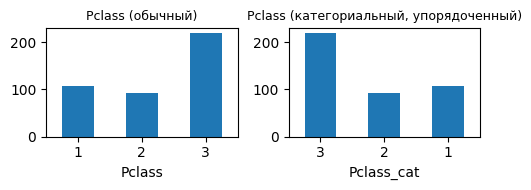

In [94]:
import matplotlib.pyplot as plt

df = titanic.copy()
fig, axes = plt.subplots(1, 2, figsize=(5, 2))

# --- ЛЕВАЯ ПАНЕЛЬ ---
# Pclass как обычная числовая колонка
df['Pclass'].value_counts().sort_index().plot.bar(ax=axes[0])
axes[0].set_title("Pclass (обычный)", fontsize=9)
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=0)


# --- ПРАВАЯ ПАНЕЛЬ ---
# Превращаем Pclass в категориальный и задаём обратный порядок
df['Pclass_cat'] = pd.Categorical(df['Pclass'], categories=[3, 2, 1], ordered=True)

df['Pclass_cat'].value_counts().sort_index().plot.bar(ax=axes[1])
axes[1].set_title("Pclass (категориальный, упорядоченный)", fontsize=9)
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=0)


plt.tight_layout()
plt.show()


###  `dt` - работа с датами и временем

> *см.* [dates formats](https://docs.python.org/3/library/datetime.html#datetime.timezone).

Когда вы работаете с датами, иногда вам нужно объяснить машине то в каком формате данные хранятся у вас. Это делается с помощью специальных символом типа `%Y %S %M` и т д. 

```python
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')
```

Пара примеров:
```python
'2020-01-01' -> '%Y-%m-%d'
'2020 01 01 13:24:41' -> '%Y %m %d %H:%M:%S'
```

Используется это вот так:


Ну а подробнее про все возмжые типы таких штук с `%` можно посмотреть [тут](https://docs.python.org/3/library/datetime.html#datetime.timezone) (в самом  низу страницы надо проскроллить)

In [133]:
covid =  pd.read_csv('https://github.com/owid/covid-19-data/raw/master/public/data/owid-covid-data.csv')

In [134]:
covid.head(3)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-03,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-04,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN


In [135]:
covid['date']

0         2020-01-03
1         2020-01-04
2         2020-01-05
3         2020-01-06
4         2020-01-07
             ...    
358745    2023-11-18
358746    2023-11-19
358747    2023-11-20
358748    2023-11-21
358749    2023-11-22
Name: date, Length: 358750, dtype: object

In [136]:
covid.query('date.str.contains("-03-")')

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
58,AFG,Asia,Afghanistan,2020-03-01,1.0,0.0,0.143,NaN,0.0,0.000,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
59,AFG,Asia,Afghanistan,2020-03-02,1.0,0.0,0.143,NaN,0.0,0.000,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
60,AFG,Asia,Afghanistan,2020-03-03,1.0,0.0,0.143,NaN,0.0,0.000,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
61,AFG,Asia,Afghanistan,2020-03-04,1.0,0.0,0.000,NaN,0.0,0.000,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
62,AFG,Asia,Afghanistan,2020-03-05,1.0,0.0,0.000,NaN,0.0,0.000,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
358509,ZWE,Africa,Zimbabwe,2023-03-27,264511.0,2.0,7.857,5679.0,0.0,0.143,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
358510,ZWE,Africa,Zimbabwe,2023-03-28,264521.0,10.0,7.286,5680.0,1.0,0.286,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
358511,ZWE,Africa,Zimbabwe,2023-03-29,264530.0,9.0,7.857,5680.0,0.0,0.143,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
358512,ZWE,Africa,Zimbabwe,2023-03-30,264535.0,5.0,6.429,5680.0,0.0,0.143,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN


In [137]:
covid['date_str'] = covid.date
covid.date = covid.date.astype('datetime64[ns]')

In [138]:
covid.date 

0        2020-01-03
1        2020-01-04
2        2020-01-05
3        2020-01-06
4        2020-01-07
            ...    
358745   2023-11-18
358746   2023-11-19
358747   2023-11-20
358748   2023-11-21
358749   2023-11-22
Name: date, Length: 358750, dtype: datetime64[ns]

In [139]:
covid.date.dt

In [140]:
covid.date.dt.month.head()

0    1
1    1
2    1
3    1
4    1
Name: date, dtype: int32

In [141]:
covid.date.dt.day_name().head()

0      Friday
1    Saturday
2      Sunday
3      Monday
4     Tuesday
Name: date, dtype: object

In [142]:
covid.query('date.dt.month == 3 and date.dt.year == 2021').head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million,date_str
423,AFG,Asia,Afghanistan,2021-03-01,55733.0,19.0,16.571,2444.0,1.0,1.571,...,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN,2021-03-01
424,AFG,Asia,Afghanistan,2021-03-02,55759.0,26.0,16.143,2446.0,2.0,1.571,...,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN,2021-03-02
425,AFG,Asia,Afghanistan,2021-03-03,55770.0,11.0,15.143,2446.0,0.0,1.429,...,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN,2021-03-03
426,AFG,Asia,Afghanistan,2021-03-04,55775.0,5.0,13.571,2446.0,0.0,1.143,...,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN,2021-03-04
427,AFG,Asia,Afghanistan,2021-03-05,55827.0,52.0,18.714,2449.0,3.0,1.000,...,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN,2021-03-05


In [143]:
covid.date.max()

Timestamp('2023-11-27 00:00:00')

In [144]:
covid.date.max() - covid.date.min()

Timedelta('1426 days 00:00:00')

In [145]:
covid.date.min()

Timestamp('2020-01-01 00:00:00')

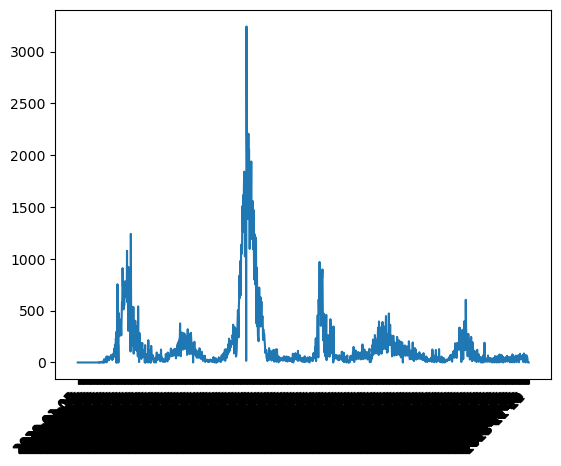

In [146]:
covid_selected = covid.query('location == "Afghanistan"')
plt.plot(covid_selected.date_str, covid_selected.new_cases)
plt.xticks(rotation=45, ha='right');

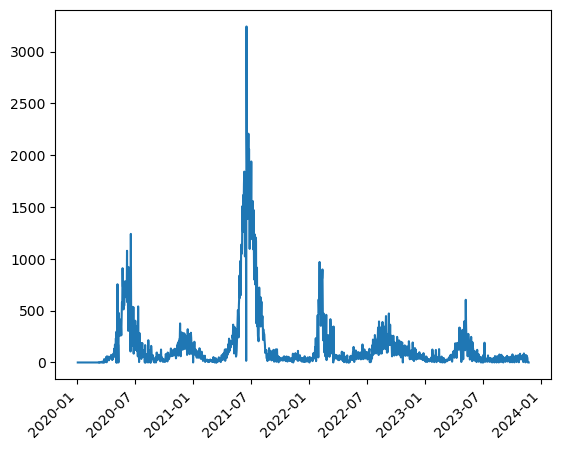

In [147]:
covid_selected = covid.query('location == "Afghanistan"')
plt.plot(covid_selected.date,  covid_selected.new_cases)
plt.xticks(rotation=45, ha='right');

## Слияние датафреймов

Объединение датафреймов — важная часть анализа данных, позволяющая сопоставлять и комбинировать информацию из разных таблиц.  
В `pandas` для этого используется набор операций:

- **`concat`** — просто «склеивает» датафреймы **по вертикали** (строки) или **по горизонтали** (столбцы), без сопоставления ключей.
- **`join`** — объединяет датафреймы **по индексам** с разными возможными типами соединрения  (`inner`, `outer`, `left`, `right`)
- **`merge`** — аналогично *join* но обращает внимание не на индексы, а на одноименные колонки (или те колонки которые ему указать)

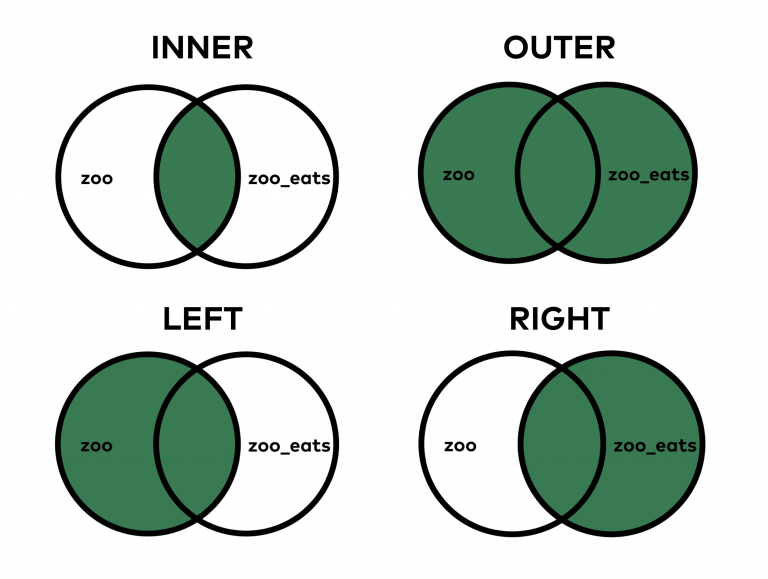

In [114]:
df1 = pd.DataFrame({'Fruit': ['apple', 'banana', 'cherry', 'orange'],
                    'Count': [3, 5, 2, 4], 'Weight': [10, 15, 3, 18]}).set_index('Fruit')

df2 = pd.DataFrame({'Fruit': ['banana', 'orange', 'pear', 'watermelon'],
                    'Price': [1.5, 2.0, 3.0, 5.0],
                    'Count': [10, 11, 21, 1]}).set_index('Fruit')

display(df1)
display(df2)

,Count,Weight
Fruit,,
apple,3,10
banana,5,15
cherry,2,3
orange,4,18


,Price,Count
Fruit,,
banana,1.5,10
orange,2.0,11
pear,3.0,21
watermelon,5.0,1


#### `pd.concat`

In [103]:
pd.concat([df1, df2])

,Count,Weight,Price
Fruit,,,
apple,3,10.0,NaN
banana,5,15.0,NaN
cherry,2,3.0,NaN
orange,4,18.0,NaN
banana,10,NaN,1.5
orange,11,NaN,2.0
pear,21,NaN,3.0
watermelon,1,NaN,5.0


In [104]:
pd.concat([df1, df2], axis=1)

,Count,Weight,Price,Count
Fruit,,,,
apple,3.0,10.0,NaN,NaN
banana,5.0,15.0,1.5,10.0
cherry,2.0,3.0,NaN,NaN
orange,4.0,18.0,2.0,11.0
pear,NaN,NaN,3.0,21.0
watermelon,NaN,NaN,5.0,1.0


#### `merge`

In [105]:
display(df1)
display(df2)

,Count,Weight
Fruit,,
apple,3,10
banana,5,15
cherry,2,3
orange,4,18


,Price,Count
Fruit,,
banana,1.5,10
orange,2.0,11
pear,3.0,21
watermelon,5.0,1


In [106]:
df1.merge(df2, on='Fruit')

,Count_x,Weight,Price,Count_y
Fruit,,,,
banana,5,15,1.5,10
orange,4,18,2.0,11


In [107]:
df1.merge(df2, on='Fruit', suffixes=['_df1', '_df2'])

,Count_df1,Weight,Price,Count_df2
Fruit,,,,
banana,5,15,1.5,10
orange,4,18,2.0,11


In [108]:
df1.merge(df2, on='Fruit', suffixes=['_df1', '_df2'], how='inner')

,Count_df1,Weight,Price,Count_df2
Fruit,,,,
banana,5,15,1.5,10
orange,4,18,2.0,11


In [109]:
df1.merge(df2, on='Fruit', suffixes=['_df1', '_df2'], how='left')

,Count_df1,Weight,Price,Count_df2
Fruit,,,,
apple,3,10,NaN,NaN
banana,5,15,1.5,10.0
cherry,2,3,NaN,NaN
orange,4,18,2.0,11.0


In [110]:
df1.merge(df2, on='Fruit', suffixes=['_df1', '_df2'], how='right')

,Count_df1,Weight,Price,Count_df2
Fruit,,,,
banana,5.0,15.0,1.5,10
orange,4.0,18.0,2.0,11
pear,NaN,NaN,3.0,21
watermelon,NaN,NaN,5.0,1


In [111]:
df1.merge(df2, on='Fruit', suffixes=['_df1', '_df2'], how='outer')

,Count_df1,Weight,Price,Count_df2
Fruit,,,,
apple,3.0,10.0,NaN,NaN
banana,5.0,15.0,1.5,10.0
cherry,2.0,3.0,NaN,NaN
orange,4.0,18.0,2.0,11.0
pear,NaN,NaN,3.0,21.0
watermelon,NaN,NaN,5.0,1.0


Обратите внимание что в случае дуплицированных значений размер итогового датафрейма может быть больше чем вы ожидаете!

In [115]:
df1 = pd.DataFrame({'Fruit': ['banana', 'banana', 'cherry', 'orange'],
                    'Count': [3, 5, 2, 4], 'Weight': [10, 15, 3, 18]}).set_index('Fruit')

df2 = pd.DataFrame({'Fruit': ['banana', 'orange', 'pear', 'watermelon'],
                    'Price': [5, 2, 3, 5],
                    'Count': [5, 11, 21, 1]}).set_index('Fruit')

display(df1)
display(df2)

,Count,Weight
Fruit,,
banana,3,10
banana,5,15
cherry,2,3
orange,4,18


,Price,Count
Fruit,,
banana,5,5
orange,2,11
pear,3,21
watermelon,5,1


In [116]:
df1.merge(df2, on='Fruit', suffixes=['_df1', '_df2'], how='inner')

,Count_df1,Weight,Price,Count_df2
Fruit,,,,
banana,3,10,5,5
banana,5,15,5,5
orange,4,18,2,11


In [117]:
df1.merge(df2, on=['Fruit', 'Count'], suffixes=['_df1', '_df2'], how='inner')

,Count,Weight,Price
Fruit,,,
banana,5,15,5


In [118]:
df1.merge(df2, on=['Fruit', 'Count'], suffixes=['_df1', '_df2'], how='left')

,Count,Weight,Price
Fruit,,,
banana,3,10,NaN
banana,5,15,5.0
cherry,2,3,NaN
orange,4,18,NaN


## Полезные функции

- **`pd.crosstab`** — быстрый способ построить перекрёстную таблицу (частоты сочетаний категорий двух колонок).  
  Полезно для анализа зависимости между категориальными признаками.

- **`pd.pivot_table`** — более гибкий инструмент для сводных таблиц, позволяющий агрегировать данные по нескольким измерениям.  
  Поддерживает выбор функции агрегации, работу с несколькими колонками значений, мультиндекс и тонкую настройку структуры таблицы.


In [95]:
pd.crosstab(titanic.Sex, titanic.Embarked)

Embarked,C,Q,S
Sex,,,
female,40,24,88
male,62,22,182


In [96]:
pd.crosstab(titanic.Sex, titanic.Embarked, margins=True)

Embarked,C,Q,S,All
Sex,,,,
female,40,24,88,152
male,62,22,182,266
All,102,46,270,418


- **`pd.qcut`** — разбивает значения на интервалы **по квантилям**, то есть так, чтобы в каждом интервале было примерно одинаковое число наблюдений.  
  Основные параметры:

  - **`x`** — входные данные (Series или массив).  
  - **`q`** — количество квантилей (например, `4` для квартилей) или список границ.  
  - **`labels`** — подписи для интервалов (по умолчанию создаются автоматически).  


In [97]:
pd.qcut(titanic.Age, q=2)

0       (27.0, 76.0]
1       (27.0, 76.0]
2       (27.0, 76.0]
3      (0.169, 27.0]
4      (0.169, 27.0]
           ...      
413              NaN
414     (27.0, 76.0]
415     (27.0, 76.0]
416              NaN
417              NaN
Name: Age, Length: 418, dtype: category
Categories (2, interval[float64, right]): [(0.169, 27.0] < (27.0, 76.0]]

In [98]:
pd.qcut(titanic.Age, q=3, labels=['Young', 'Adult', 'Eldery'])

0      Eldery
1      Eldery
2      Eldery
3       Adult
4       Young
        ...  
413       NaN
414    Eldery
415    Eldery
416       NaN
417       NaN
Name: Age, Length: 418, dtype: category
Categories (3, object): ['Young' < 'Adult' < 'Eldery']

# Немного статистики


В экосистеме Python есть множество библиотек, которые упрощают проведение статистического анализа — от простых тестов до сложных моделей.

- [SciPy](https://scipy.org/)
- [statsmodels](https://www.statsmodels.org/stable/)
- [pingouin](https://pingouin-stats.org/build/html/index.html)
- [scikit-learn](https://scikit-learn.org/stable/index.html)


### Пример 1. Генерация случайного нормального распределения

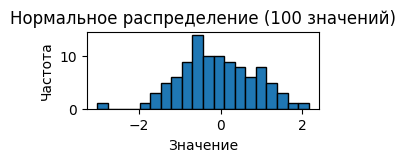

In [124]:
import numpy as np

# 100 значений из нормального распределения
data = np.random.normal(loc=0, scale=1, size=100)


plt.figure(figsize=(3,1))
plt.hist(data, bins=20, edgecolor='black')
plt.title("Нормальное распределение (100 значений)")
plt.xlabel("Значение")
plt.ylabel("Частота")
plt.show()

### Пример 2. t-test вручную 

In [121]:
# две выборки
a = np.random.normal(0, 1, 50)
b = np.random.normal(0.3, 1, 50)
mean_a = a.mean()
mean_b = b.mean()
var_a = a.var(ddof=1)
var_b = b.var(ddof=1)
n1, n2 = len(a), len(b)
sp = np.sqrt(((n1-1)*var_a + (n2-1)*var_b) / (n1+n2-2))
t_value = (mean_a - mean_b) / (sp * np.sqrt(1/n1 + 1/n2))

t_value

-0.559431282968204

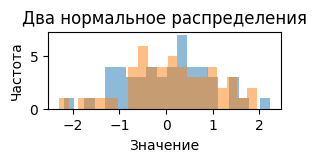

In [126]:
plt.figure(figsize=(3,1))
plt.hist(a, bins=20, alpha=0.5, label='a')
plt.hist(b, bins=20, alpha=0.5, label='b')
plt.title("Два нормальное распределения")
plt.xlabel("Значение")
plt.ylabel("Частота")
plt.show()

## Пример 3. Использование Pingouin для статистических тестов

*pingouin* — удобная библиотека, предоставляющая простой синтаксис для большинства статистических задач.

In [127]:
import pingouin as pg

In [149]:
# t-test one-sample
pg.ttest(a, 0)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,0.31182,49,two-sided,0.7565,"[-0.22, 0.3]",0.044098,0.161,0.060777


In [150]:
# t-test two-sample
pg.ttest(a, b)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-0.559431,98,two-sided,0.577144,"[-0.47, 0.27]",0.111886,0.242,0.085832


In [130]:
# MWU-test
pg.mwu(a, b)

,U-val,alternative,p-val,RBC,CLES
MWU,1158.0,two-sided,0.528181,-0.0736,0.4632


In [132]:
# Pearson correlation
x = np.random.normal(size=100)
y = x * 0.5 + np.random.normal(size=100)
pg.corr(x, y, method='pearson')

,n,r,CI95%,p-val,BF10,power
pearson,100,0.427139,"[0.25, 0.58]",0.000009,1994.15,0.994689


In [139]:
# linear regression
df = pg.read_dataset("penguins")   # встроенный датасет
df = df.dropna(subset=["bill_length_mm", "bill_depth_mm"])  # убираем пропуски
pg.linear_regression(df[["bill_depth_mm"]], df["bill_length_mm"])

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,55.067370,2.515951,21.887295,6.914549e-67,0.05525,0.052471,50.118580,60.016160
1,bill_depth_mm,-0.649836,0.145733,-4.459093,1.119662e-05,0.05525,0.052471,-0.936487,-0.363184


In [144]:
df.head(3)

,Subject,Hair color,Pain threshold
0,1,Light Blond,62
1,2,Light Blond,60
2,3,Light Blond,71


In [145]:
# ANOVA
df = pg.read_dataset("anova")  # встроенный датасет для ANOVA
pg.anova(dv='Pain threshold', between='Hair color', data=df)

,Source,ddof1,ddof2,F,p-unc,np2
0,Hair color,3,15,6.791407,0.004114,0.575962


In [146]:
df.head(3)

,Subject,Hair color,Pain threshold
0,1,Light Blond,62
1,2,Light Blond,60
2,3,Light Blond,71


## Пример 4. Линейная регрессия в `statsmodels` 

Построим линейную регрессию, где целевая переменная — стоимость билета `Fare`,  
а предикторы — пол пассажира (`Sex`), возраст (`Age`) и класс (`Pclass`).  
Используем формульный синтаксис `statsmodels` и посмотрим табличку `summary()`.



In [158]:
import statsmodels.formula.api as smf

# Уберём строки с пропусками в нужных колонках
data = titanic[['Fare', 'Sex', 'Age', 'Pclass']].dropna()

# Линейная модель: Fare ~ Sex + Age + Pclass
# C(...) означает, что переменная рассматривается как категориальная
model = smf.ols('Fare ~ C(Sex) + Age + C(Pclass)', data=data).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Fare   R-squared:                       0.413
Model:                            OLS   Adj. R-squared:                  0.406
Method:                 Least Squares   F-statistic:                     57.39
Date:                Thu, 27 Nov 2025   Prob (F-statistic):           1.26e-36
Time:                        20:56:38   Log-Likelihood:                -1742.9
No. Observations:                 331   AIC:                             3496.
Df Residuals:                     326   BIC:                             3515.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        101.6615     10.220      9.947      0.000      81.556     121.767
C(Sex)[T.male]   -13.6627      5.404     -2.528      0.012     -24.293      -3.032
C(Pclass)[T.2]   -73.8580      7.481     -9.873      0.000     -88.574     -59.142
C(Pclass)[T.3]   -83.9645      7.264    -11.559      0.000     -98.255     -69.674
Age                0.1378      0.215      0.640      0.523      -0.286       0.562
==============================================================================
Omnibus:                      253.660   Durbin-Watson:                   2.098
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5065.998
Skew:                           2.964   Prob(JB):                         0.00
Kurtosis:                      21.226   Cond. No.                         165.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Вклад предикторов: barplot коэффициентов

Построим barplot по оценкам коэффициентов модели (без свободного члена),  
чтобы визуально сравнить «вклад» разных признаков.


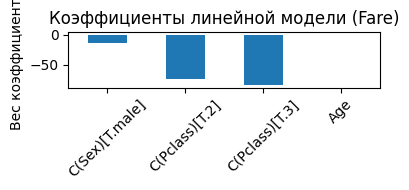

In [159]:
import pandas as pd
import matplotlib.pyplot as plt

# Коэффициенты модели в виде Series
coef = model.params.drop('Intercept')

plt.figure(figsize=(4, 2))
coef.plot(kind='bar')
plt.title("Коэффициенты линейной модели (Fare)")
plt.ylabel("Вес коэффициента")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Диагностика модели: остатки и предсказания

Построим классические диагностические графики:

1. Зависимость остатков от предсказанных значений  
2. Корреляция реальных значений с предсказанными  
3. Q–Q plot остатков (проверка на нормальность)


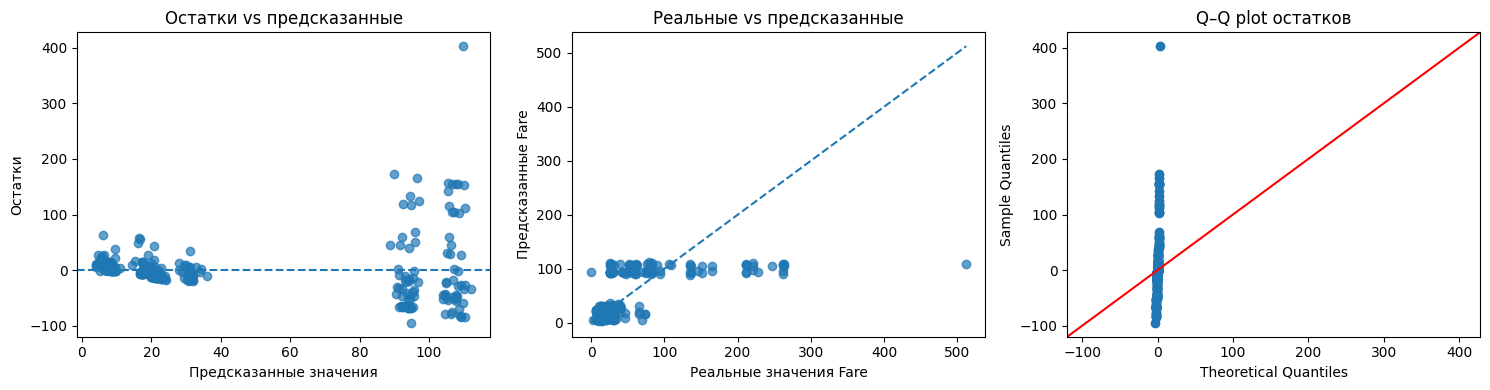

In [162]:
import statsmodels.api as sm

# Предсказанные значения и остатки
y_true = data['Fare']
y_pred = model.fittedvalues
resid = model.resid

fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# 1. Остатки vs предсказанные
axes[0].scatter(y_pred, resid, alpha=0.7)
axes[0].axhline(0, linestyle='--')
axes[0].set_xlabel("Предсказанные значения")
axes[0].set_ylabel("Остатки")
axes[0].set_title("Остатки vs предсказанные")

# 2. Реальные vs предсказанные
axes[1].scatter(y_true, y_pred, alpha=0.7)
axes[1].plot([y_true.min(), y_true.max()],
             [y_true.min(), y_true.max()],
             linestyle='--')
axes[1].set_xlabel("Реальные значения Fare")
axes[1].set_ylabel("Предсказанные Fare")
axes[1].set_title("Реальные vs предсказанные")

# 3. Q–Q plot остатков
sm.qqplot(resid, line='45', ax=axes[2])
axes[2].set_title("Q–Q plot остатков")

plt.tight_layout()
plt.show()
